### Load and process results

In [72]:
import pandas as pd

In [73]:
# Load data

int_types = ['cpu', 'l1d', 'l1i', 'l2', 'llc', 'membw', 'no_intf']
QPSrange = range(5000, 80001, 5000)

#cpu = []
#l1d = []
#l1i = []
#llc = []
#membw = []
#no_intf = []

run_results = {'cpu':[], 
           'l1d':[], 
           'l1i':[], 
           'l2':[], 
           'llc':[], 
           'membw':[], 
           'no_intf':[]
          }

run_achieved_qps = {'cpu':[], 
           'l1d':[], 
           'l1i':[], 
           'l2':[], 
           'llc':[], 
           'membw':[], 
           'no_intf':[]
          }




In [92]:
base_path = 'results_part1/'
for iname in int_types:
    # Construct path to results
    if iname == 'no_intf':
        res_path = iname + '/run'
    else:
        res_path = 'ibench-' + iname + '/run'
    # Load each run's results
    for i in range(1, 3):
        data = pd.read_csv(base_path + res_path + str(i) + '.ssv' ,delim_whitespace=True)
        res = list(data['p95'])
        qps = list(data['QPS'])
        run_results[iname].append(res)
        run_achieved_qps[iname].append(qps)
    

### import numpy as np



In [93]:
import numpy as np
from matplotlib import pyplot as plt

([<matplotlib.axis.XTick object at 0x7faba7264580>,
 [Text(5000, 0, '5k'),
  Text(10000, 0, '10k'),
  Text(15000, 0, '15k'),
  Text(20000, 0, '20k'),
  Text(25000, 0, '25k'),
  Text(30000, 0, '30k'),
  Text(35000, 0, '35k'),
  Text(40000, 0, '40k'),
  Text(45000, 0, '45k'),
  Text(50000, 0, '50k'),
  Text(55000, 0, '55k'),
  Text(60000, 0, '60k'),
  Text(65000, 0, '65k'),
  Text(70000, 0, '70k'),
  Text(75000, 0, '75k'),
  Text(80000, 0, '80k')])

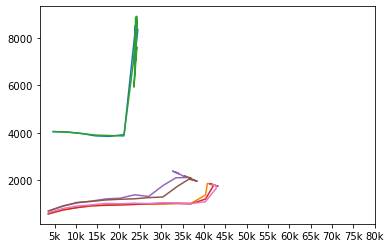

In [110]:
for key in run_results:
    arrays_lat = [np.array(x) for x in run_results[key]]
    arrays_qps = [np.array(x) for x in run_achieved_qps[key]]
    
    means_lat = [np.mean(k) for k in zip(*arrays_lat)]
    errors_lat = [np.std(k) for k in zip(*arrays_lat)]
    
    means_qps = [np.mean(k) for k in zip(*arrays_qps)]
    errors_qps = [np.std(k) for k in zip(*arrays_qps)]
    
    plt.plot(means_qps, means_lat)
    

xlabs = ['5k','10k','15k','20k','25k','30k','35k','40k','45k','50k','55k','60k','65k', '70k','75k','80k']
plt.xticks(range(5000, 80001, 5000), xlabs)